### 발전실적

In [3]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
df=pd.read_excel('./한국남동발전_발전실적.xls')
df.head()

,사업소,호기,일자,용량(MW),발전량(MWh),열효율(%),이용률(%),발전원
0,경상대태양광,1,202412,0.91,78.62,0.0,11.61,태양력
1,고흥만 수상태양광,1,202412,63.48,6026.18,0.0,12.76,태양력
2,광양항세방태양광,1,202412,3.10,204.02,0.0,8.85,태양력
3,구미태양광,1,202412,0.99,94.24,0.0,12.79,태양력
4,군위 화산풍력,1,202412,11.55,3323.39,0.0,38.67,NaN


In [5]:
df.shape

(1513, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업소       1513 non-null   object 
 1   호기        1513 non-null   object 
 2   일자        1513 non-null   int64  
 3   용량(MW)    1513 non-null   float64
 4   발전량(MWh)  1513 non-null   float64
 5   열효율(%)    1513 non-null   float64
 6   이용률(%)    1513 non-null   float64
 7   발전원       1489 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 94.7+ KB


In [7]:
df.isna().sum()

사업소          0
호기           0
일자           0
용량(MW)       0
발전량(MWh)     0
열효율(%)       0
이용률(%)       0
발전원         24
dtype: int64

In [8]:
df.describe()

,일자,용량(MW),발전량(MWh),열효율(%),이용률(%)
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,202357.007270,148.044171,53209.547085,13.381633,30.321269
std,50.116722,265.262367,133509.339924,17.487432,30.916612
min,202301.000000,0.080000,0.000000,0.000000,0.000000
25%,202307.000000,1.540000,80.450000,0.000000,8.720000
50%,202401.000000,5.720000,803.130000,0.000000,14.680000
75%,202407.000000,115.000000,12788.000000,30.850000,51.380000
max,202412.000000,870.000000,613941.250000,60.900000,109.460000


In [9]:
df.describe(include='O')

,사업소,호기,발전원
count,1513,1513,1489
unique,29,18,7
top,분당,1,태양력
freq,240,601,540


In [10]:
# 연도, 월 분리

df['연도'] = df['일자'].astype('str').str[0:4].astype(int)
df['월'] = df['일자'].astype('str').str[4:7].astype(int)


In [11]:
df.head()

,사업소,호기,일자,용량(MW),발전량(MWh),열효율(%),이용률(%),발전원,연도,월
0,경상대태양광,1,202412,0.91,78.62,0.0,11.61,태양력,2024,12
1,고흥만 수상태양광,1,202412,63.48,6026.18,0.0,12.76,태양력,2024,12
2,광양항세방태양광,1,202412,3.10,204.02,0.0,8.85,태양력,2024,12
3,구미태양광,1,202412,0.99,94.24,0.0,12.79,태양력,2024,12
4,군위 화산풍력,1,202412,11.55,3323.39,0.0,38.67,NaN,2024,12


In [12]:
# 발전원 null값 처리 -> 알수없음

df['발전원'] = df['발전원'].fillna('알수없음')
df.head()

,사업소,호기,일자,용량(MW),발전량(MWh),열효율(%),이용률(%),발전원,연도,월
0,경상대태양광,1,202412,0.91,78.62,0.0,11.61,태양력,2024,12
1,고흥만 수상태양광,1,202412,63.48,6026.18,0.0,12.76,태양력,2024,12
2,광양항세방태양광,1,202412,3.10,204.02,0.0,8.85,태양력,2024,12
3,구미태양광,1,202412,0.99,94.24,0.0,12.79,태양력,2024,12
4,군위 화산풍력,1,202412,11.55,3323.39,0.0,38.67,알수없음,2024,12


In [13]:
# df.drop(columns=['일자'], inplace=True)

In [14]:
df.head()

,사업소,호기,일자,용량(MW),발전량(MWh),열효율(%),이용률(%),발전원,연도,월
0,경상대태양광,1,202412,0.91,78.62,0.0,11.61,태양력,2024,12
1,고흥만 수상태양광,1,202412,63.48,6026.18,0.0,12.76,태양력,2024,12
2,광양항세방태양광,1,202412,3.10,204.02,0.0,8.85,태양력,2024,12
3,구미태양광,1,202412,0.99,94.24,0.0,12.79,태양력,2024,12
4,군위 화산풍력,1,202412,11.55,3323.39,0.0,38.67,알수없음,2024,12


### EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업소       1513 non-null   object 
 1   호기        1513 non-null   object 
 2   일자        1513 non-null   int64  
 3   용량(MW)    1513 non-null   float64
 4   발전량(MWh)  1513 non-null   float64
 5   열효율(%)    1513 non-null   float64
 6   이용률(%)    1513 non-null   float64
 7   발전원       1513 non-null   object 
 8   연도        1513 non-null   int64  
 9   월         1513 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 118.3+ KB


| 컬럼명        | 설명                             | 관련 컬럼                                 |
| ---------- | ------------------------------ | ------------------------------------- |
| `사업소`      | 발전소 명 또는 위치를 나타내는 식별자          | `호기`, `발전원`과 함께 설비 정보로 묶임             |
| `호기`       | 해당 발전소 내 개별 설비 (호기 번호)         | `사업소`, `용량(MW)`, `발전원`과 밀접            |
| `용량(MW)`   | 해당 호기의 최대 발전 용량                | `발전량(MWh)`, `이용률(%)`과 함수적 관계          |
| `발전량(MWh)` | 실제로 한 달간 생산한 전력량               | `용량(MW)`, `이용률(%)`, `열효율(%)`과 정량적 관계  |
| `열효율(%)`   | 투입 에너지 대비 전력 생산 효율             | `발전량(MWh)`, `발전원`과 관련 (연료 효율성)        |
| `이용률(%)`   | 설비의 가동 비율 (실제 발전량 / 최대 발전 ,가능량),발전소를 얼마나 활용했는지 비율 | `용량(MW)`, `발전량(MWh)`과 직접적 함수 관계       |
| `발전원`      | 석탄, 가스, 원자력 등 발전 방식            | `열효율(%)`, `이용률(%)`, `발전량(MWh)`과 영향 관계 |
| `연도`       | 발전 시점 (연도)                     | `월`과 함께 시간 정보로 시계열 분석 가능              |
| `월`        | 발전 시점 (월)                      | 계절성 요인 분석 시 활용 (`발전량`, `이용률`과 관계)     |


- 발전량 = 용량(mw) * 시간 *( 이용률/100 )
- 열효율 = (전기로 전환된 에너지(MWh)/투입된 연료 에너지 (MWh))*100
- 열효율이 높을수록 같은 연료로 더 많은 전기 생산이 가능

In [16]:
df['일자'].value_counts()

일자
202412    64
202405    64
202411    64
202401    64
202402    64
202403    64
202404    64
202312    64
202410    64
202406    63
202407    63
202408    63
202409    63
202311    63
202310    63
202309    63
202308    62
202307    62
202306    62
202305    62
202304    62
202303    62
202302    62
202301    62
Name: count, dtype: int64

In [17]:
df['월'].value_counts()

월
12    128
11    127
10    127
9     126
5     126
4     126
3     126
2     126
1     126
8     125
7     125
6     125
Name: count, dtype: int64

In [18]:
# 연도-월 시계열 컬럼 생성
df['연월'] = pd.to_datetime(df['연도'].astype(str) + '-' + df['월'].astype(str) + '-01')    
df.head()

,사업소,호기,일자,용량(MW),발전량(MWh),열효율(%),이용률(%),발전원,연도,월,연월
0,경상대태양광,1,202412,0.91,78.62,0.0,11.61,태양력,2024,12,2024-12-01
1,고흥만 수상태양광,1,202412,63.48,6026.18,0.0,12.76,태양력,2024,12,2024-12-01
2,광양항세방태양광,1,202412,3.10,204.02,0.0,8.85,태양력,2024,12,2024-12-01
3,구미태양광,1,202412,0.99,94.24,0.0,12.79,태양력,2024,12,2024-12-01
4,군위 화산풍력,1,202412,11.55,3323.39,0.0,38.67,알수없음,2024,12,2024-12-01


In [19]:
df.to_csv('./발전실적.csv', index=False)

### 연도별

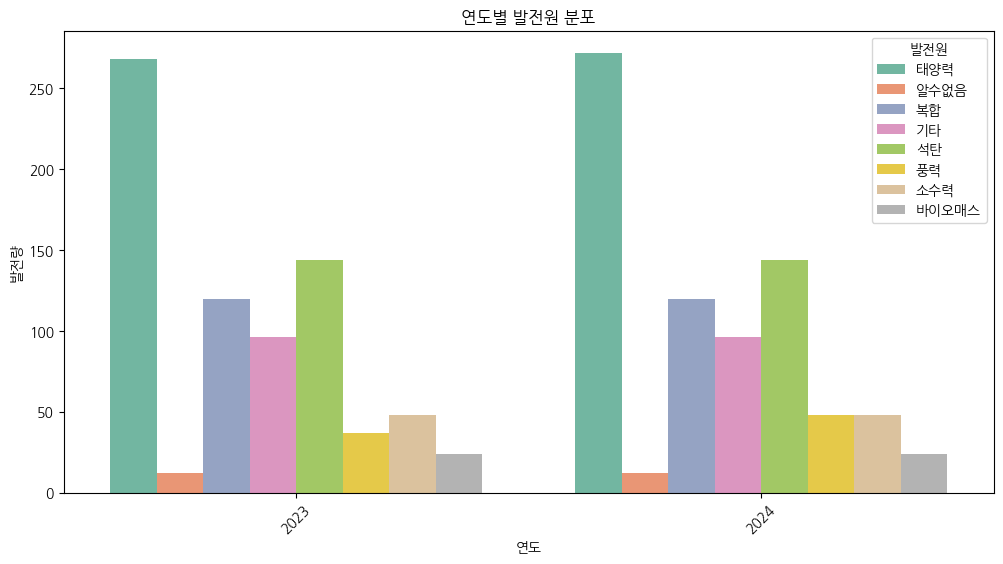

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='연도', hue='발전원', palette='Set2')
plt.title('연도별 발전원 분포')
plt.xlabel('연도')
plt.ylabel('발전량')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

In [21]:
# 연도별 평균값
df.pivot_table(index='연도', columns='발전원', values=['발전량(MWh)'], aggfunc='mean')

발전량(MWh)                                                         \
발전원            기타         바이오매스            복합             석탄         소수력   
연도                                                                         
2023  2383.965312  62834.989583  19342.058333  254492.417083  647.522917   
2024  3013.020313  68471.947083  18882.783333  244628.748819  749.699375   

                                            
발전원          알수없음         태양력           풍력  
연도                                          
2023  1375.163333  242.477239   775.691081  
2024  1315.368333  450.322206  1262.783125

In [22]:
# 발전원별로 2024년의 평균이 

In [23]:
df.pivot_table(index='연도', columns='발전원', values=['용량(MW)'], aggfunc='mean')

용량(MW)                                                           
발전원        기타  바이오매스      복합          석탄  소수력   알수없음       태양력        풍력
연도                                                                      
2023  6.48875  162.5  92.208  655.716667  4.4  11.55  2.549552  15.72973
2024  6.48875  162.5  92.208  655.716667  4.4  11.55  4.377904  16.93750

In [24]:
df.pivot_table(index='연도', columns='발전원', values=['열효율(%)'], aggfunc='mean')

열효율(%)                                                
발전원          기타 바이오매스         복합         석탄  소수력 알수없음  태양력   풍력
연도                                                             
2023  33.958854   0.0  21.778167  29.764444  0.0  0.0  0.0  0.0
2024  35.762813   0.0  21.013417  28.694861  0.0  0.0  0.0  0.0

In [ ]:
# 열효율이 0인 이유는 연료 투입 개념이 없는 요소들
# 기타는 뭘까 -> LNG, 목탄(우드팰릿)
# 기타와 석탄이 열효율 좋은 편 -> 같은 연료로 더 많은 발전 가능

In [26]:
df.pivot_table(index='연도', columns='발전원', values=['이용률(%)'], aggfunc='mean')

이용률(%)                                                         \
발전원          기타      바이오매스         복합         석탄        소수력       알수없음   
연도                                                                       
2023  55.906875  55.547083  30.487750  53.621111  19.288333  16.305000   
2024  65.434167  58.638333  29.619333  49.954167  21.853333  15.469167   

                           
발전원         태양력        풍력  
연도                         
2023  11.868619  5.537297  
2024  11.841029  8.264167

In [27]:
# 2023~2024년 평균을 보면, 기타 > 바이오매스 ≈ 석탄 > 복합 > 수력 > 태양광 > 풍력 순
# 기저 발전원( 꾸준히 가동 가능한 발전원) 이 높은 이용률 보임
# 풍력, 태양력은 자연조건 의존도 높아서 가동률이 낮고 변동성 큼
# 기타 ,바이오메스, 소수력, 풍력이 증가 추세 -> 환경에너지의 중요성 증가

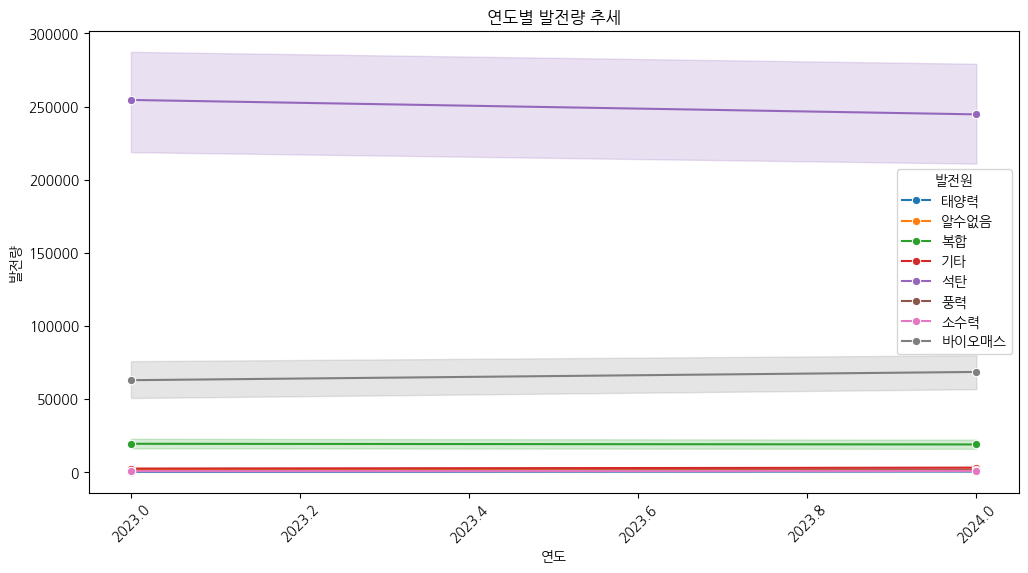

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연도', y='발전량(MWh)', hue='발전원', marker='o')
plt.title('연도별 발전량 추세')
plt.xlabel('연도')
plt.ylabel('발전량')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

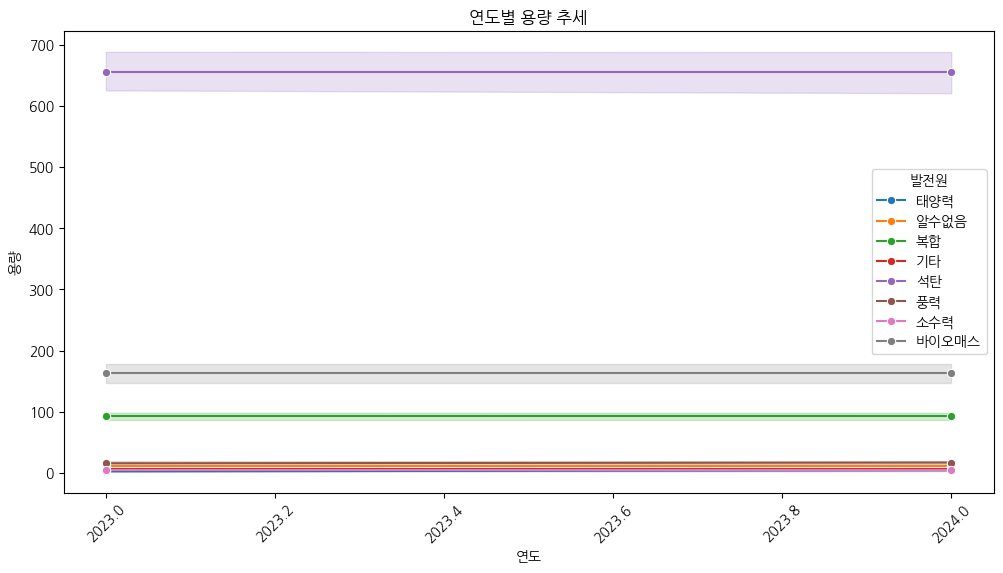

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연도', y='용량(MW)', hue='발전원', marker='o')
plt.title('연도별 용량 추세')
plt.xlabel('연도')
plt.ylabel('용량')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

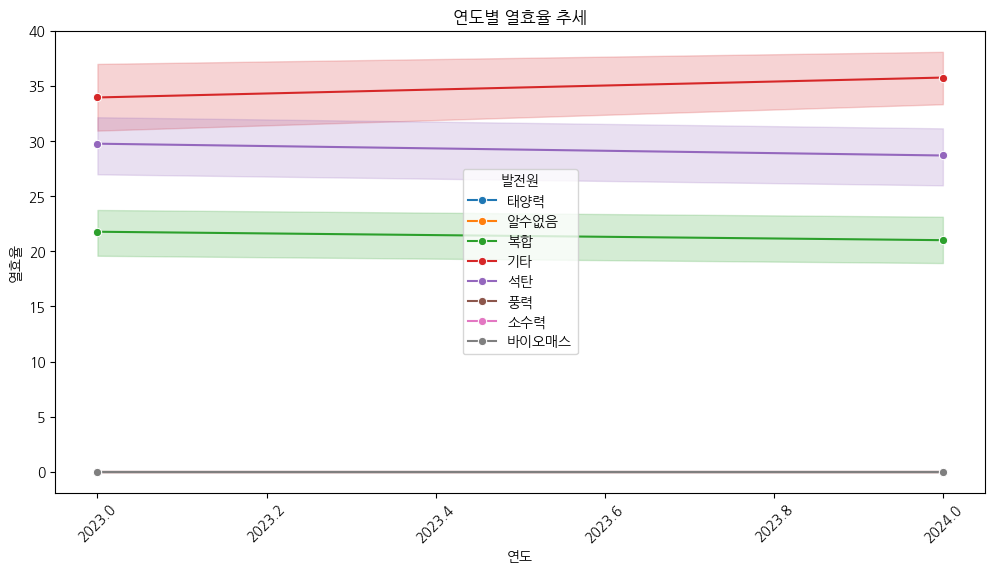

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연도', y='열효율(%)', hue='발전원', marker='o')
plt.title('연도별 열효율 추세')
plt.xlabel('연도')
plt.ylabel('열효율')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

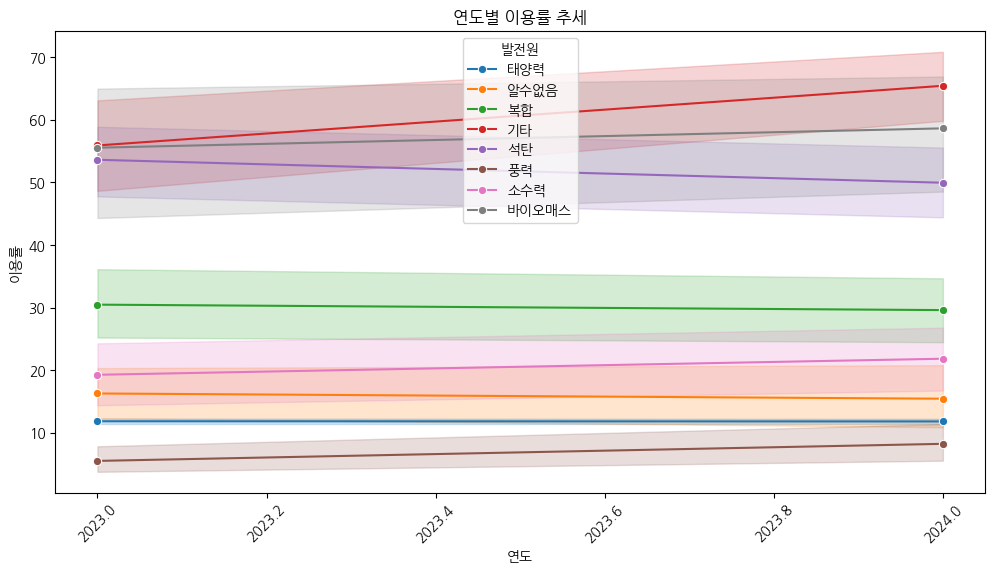

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연도', y='이용률(%)', hue='발전원', marker='o')
plt.title('연도별 이용률 추세')
plt.xlabel('연도')
plt.ylabel('이용률')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

### 연월별

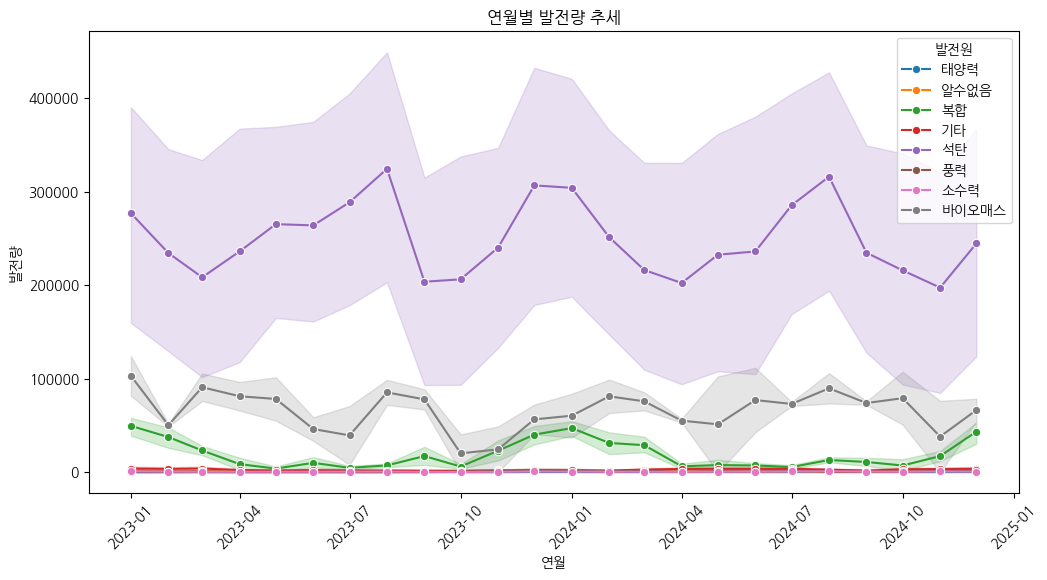

In [32]:
# 시계열별 추세 파악
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연월', y='발전량(MWh)', hue='발전원', marker='o')
plt.title('연월별 발전량 추세')
plt.xlabel('연월')
plt.ylabel('발전량')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

In [ ]:
# 연월별로 추세가 변동이 많은 발전원은 의외로 석탄, 바이오매스
# 석탄도 계절 탈 수 있음 

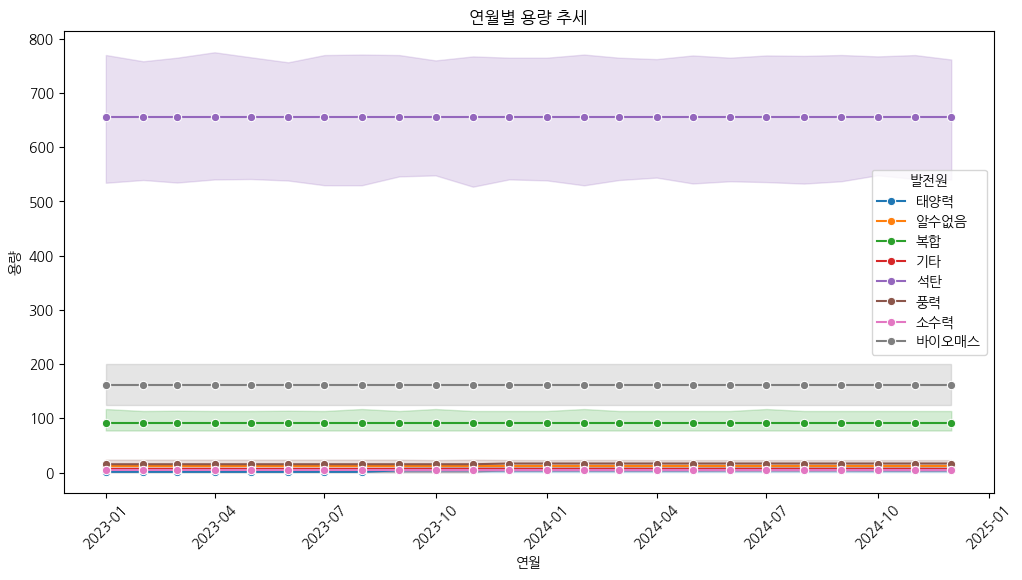

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연월', y='용량(MW)', hue='발전원', marker='o')
plt.title('연월별 용량 추세')
plt.xlabel('연월')
plt.ylabel('용량')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

In [35]:
# 용량은 일정

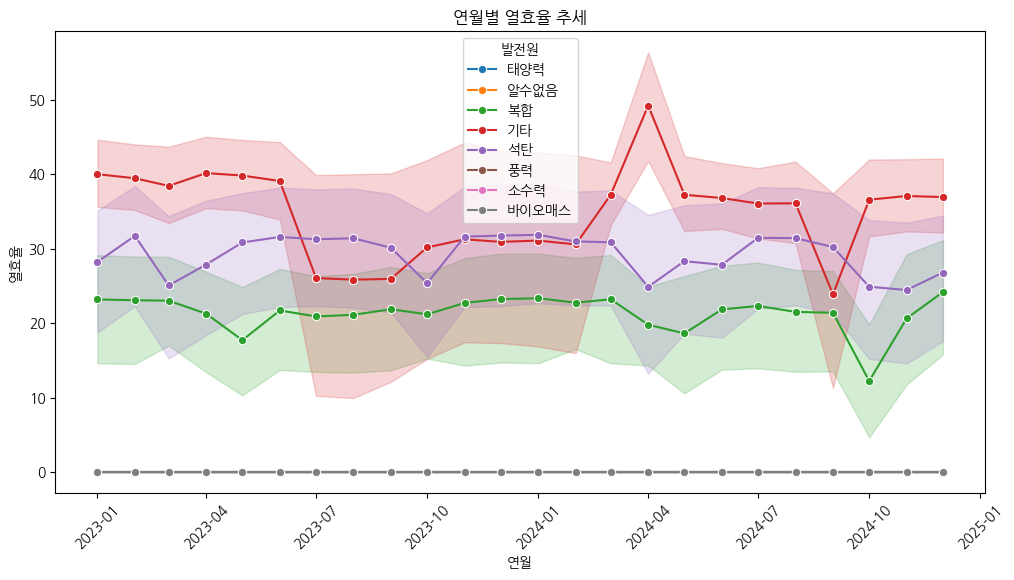

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연월', y='열효율(%)', hue='발전원', marker='o')
plt.title('연월별 열효율 추세')
plt.xlabel('연월')
plt.ylabel('열효율')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

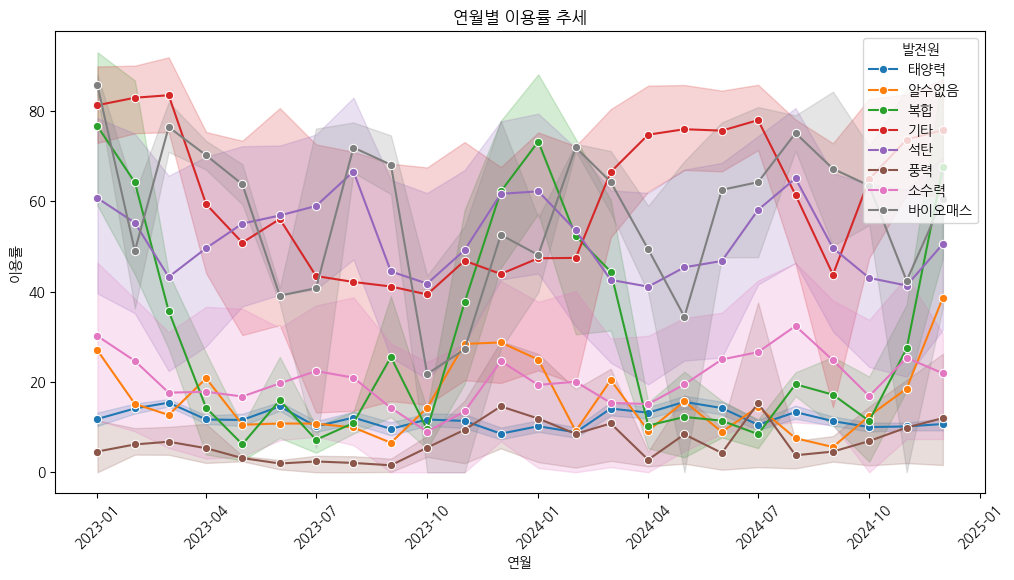

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연월', y='이용률(%)', hue='발전원', marker='o')
plt.title('연월별 이용률 추세')
plt.xlabel('연월')
plt.ylabel('이용률')
plt.xticks(rotation=45)
plt.legend(title='발전원')
plt.show()

### 수치형 변수들의 상관관계

In [38]:
df.columns

Index(['사업소', '호기', '일자', '용량(MW)', '발전량(MWh)', '열효율(%)', '이용률(%)', '발전원',
       '연도', '월', '연월'],
      dtype='object')

<Axes: >

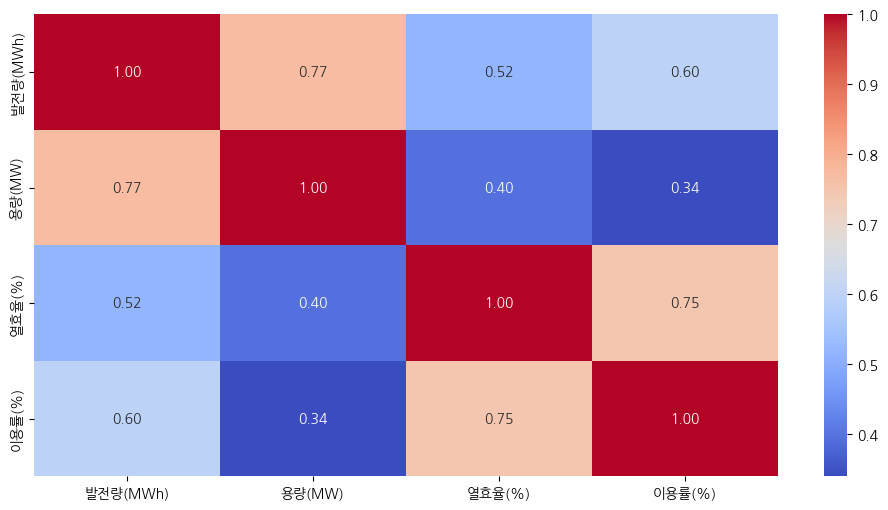

In [39]:
num_cols = ['발전량(MWh)', '용량(MW)', '열효율(%)', '이용률(%)']
cat_cols = ['연도', '월', '발전원']

plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='coolwarm', fmt='.2f' )

In [40]:
# 발전량은 이용률, 열효율, 용량과 양의 상관관계 갖음
# 발전량 = 용량 * 이용률 * 열효율 -> 공식에 의하면 당연한 결과
# 열효율 높으면 이용률도 높음

### 수치형 변수 시각화

/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_17147/2060024460.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='발전원', y=num_cols[i], palette='Set2')
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_17147/2060024460.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='발전원', y=num_cols[i], palette='Set2')
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_17147/2060024460.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='발전원', y=num_cols[i], palette='Set2')
/var/folders/

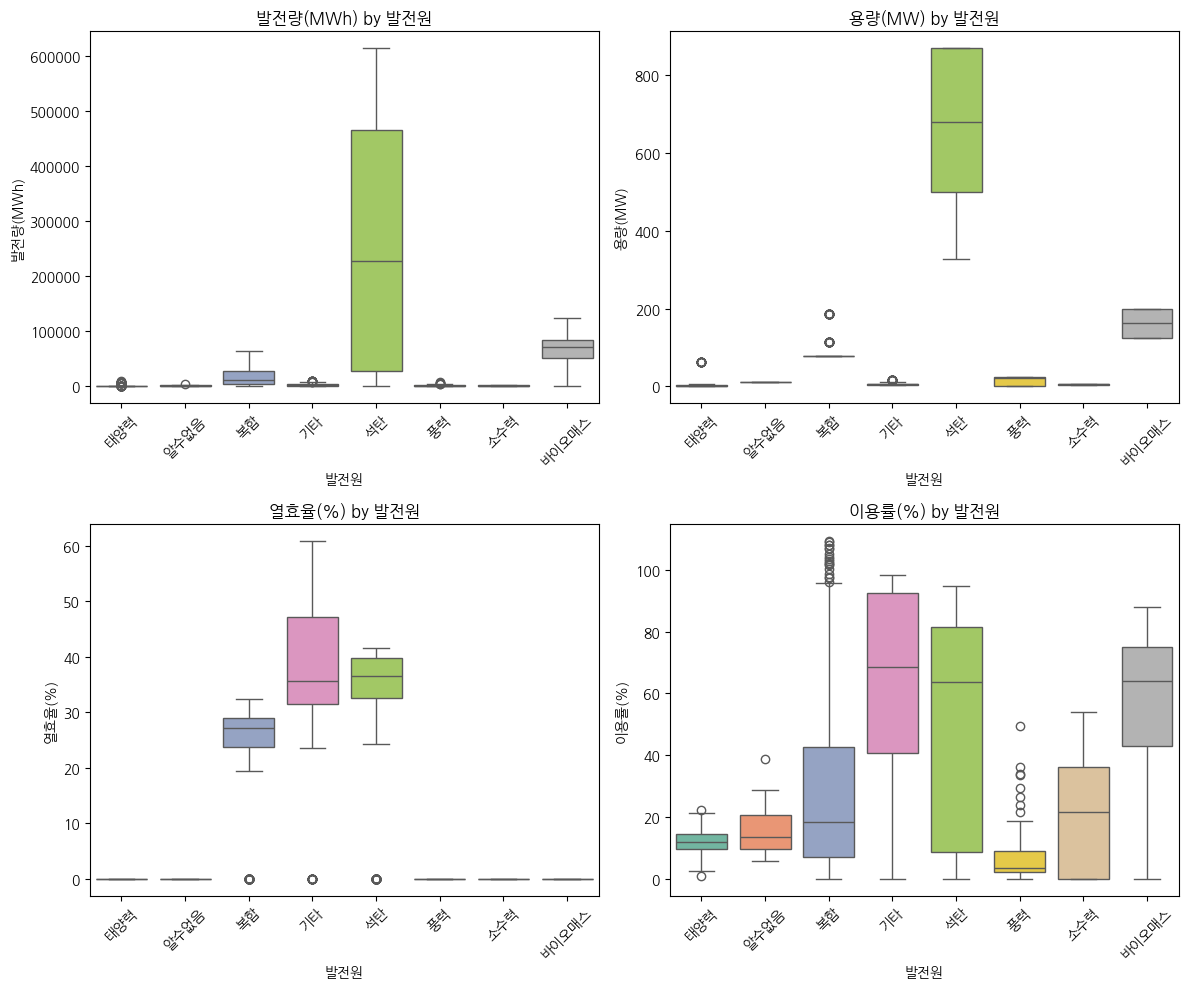

In [41]:
# 한줄에 두개씩 수치형 변수들 시각화 (변수별로 라인-박스)
# 전체 subplot 수 계산
n = len(num_cols)
n_cols = 2  # 한 줄에 2개
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(6 * n_cols, 5 * n_rows))  # 크기 자동 조정

for i in range(n):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x='발전원', y=num_cols[i], palette='Set2')
    plt.title(f'{num_cols[i]} by 발전원')
    plt.xticks(rotation=45)
    plt.xlabel('발전원')
    plt.ylabel(num_cols[i])

plt.tight_layout()
plt.show()


### 범주형 변수 시각화

In [42]:
# 범주형 전체 subplot 수 계산
cat_cols = ['연도', '월', '발전원']
n = len(cat_cols)
n_cols = 2  # 한 줄에 2개
n_rows = math.ceil(n / n_cols)



### 사업소별

In [43]:
# 사업소별 평균 수치형 변수값
df.pivot_table(index='사업소', values=num_cols, aggfunc='mean').reset_index()


,사업소,발전량(MWh),열효율(%),용량(MW),이용률(%)
0,경상대태양광,77.570417,0.000000,0.910000,11.662500
1,고흥만 수상태양광,6906.704375,0.000000,63.480000,14.850625
2,광양항세방태양광,262.296667,0.000000,3.100000,11.572500
3,구미태양광,92.804167,0.000000,0.990000,12.817500
4,군위 화산풍력,1345.265833,0.000000,11.550000,15.887083
5,두산태양광,7.324167,0.000000,0.080000,12.518750
6,분당,19112.420833,21.395792,92.208000,30.053542
7,분당연료전지,2482.612569,33.702639,6.598333,57.532153
8,삼천포,217078.395833,33.775833,530.000000,56.157396
9,삼천포태양광,73.306771,0.000000,0.822500,11.703229


#### 이용률 (설비 활용도)

In [45]:
# 이용률 기준으로 (설비 화용도 ) 사업소 실적 확인

df.pivot_table(index='사업소', values=['이용률(%)'], aggfunc='mean').reset_index().sort_values(by='이용률(%)', ascending=False) 


,사업소,이용률(%)
17,여수연료전지,77.589167
14,안산연료전지,62.582083
7,분당연료전지,57.532153
19,영동,57.092708
8,삼천포,56.157396
16,여수,50.922083
21,영흥,49.162986
13,삼천포해양소수력,38.821250
6,분당,30.053542
15,어음풍력,23.790000


#### 열효율( 연료 전략 수준)

In [46]:
df.pivot_table(index='사업소', values=['열효율(%)'], aggfunc='mean').reset_index().sort_values(by='열효율(%)', ascending=False) 


,사업소,열효율(%)
17,여수연료전지,40.669583
14,안산연료전지,36.001250
16,여수,34.594375
8,삼천포,33.775833
7,분당연료전지,33.702639
21,영흥,24.410625
6,분당,21.395792
27,예천태양광,0.000000
26,영흥해양소수력,0.000000
25,영흥풍력,0.000000


In [44]:
# 큰지역별로 확인-> 컬럼 생성
# 변수별 수학적 파생 변수